In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [57]:
# Reading CSV file and transposing
dataset = pd.read_csv('grendene-indicadores-financeiros.csv').transpose()

# Setting columns names as the data's first column and removing that column
dataset.columns = dataset.iloc[0]
dataset = dataset.iloc[1:,]

# Transforming index to datetime
dataset['Trimestre'] = pd.to_datetime(dataset.index.values)
dataset = dataset.set_index('Trimestre')
dataset.head()

Data,LPA Lucro por Acao $,VPA Valor Patr por Acao$,Vendas por Acao $,EBITDA por Acao $,Divida Total Liquida $,Divida Total Bruta $,Divida Bruta / Atv Tt %,Divida Bruta / Pat Liq %,Divida Liq / Pat Liq %,Estr Cap (D/D+Pat Liq) %,...,ROIC (IC inicial) %,Invested Capital $,Rentab Invest Subsid %,Alavancagem Financ x,Alavancagem Operac x,Capex (incl invest) $,Depreciacao e amortiz $,Capex (inc inv)/Deprec %,Deprec / Imob e Intang %,Fluxo de caixa livre $
Trimestre,,,,,,,,,,,,,,,,,,,,,
2003-12-31,0.648354,2.21104,1.83187,1.0847,6.8965e+07,1.32215e+08,14.5,19.1,10,16,...,NaN,6.23761e+08,210.8,1.3,2.1,2.49281e+08,9.9683e+07,250.1,NaN,NaN
2004-03-31,NaN,2.25414,NaN,NaN,1.31742e+08,1.34186e+08,14.5,19,18.7,16,...,NaN,5.74486e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-06-30,NaN,2.31287,NaN,NaN,1.86723e+08,1.38671e+08,14.7,19.1,25.8,16.1,...,NaN,5.37906e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-09-30,NaN,0.826589,NaN,NaN,1.1183e+08,1.43357e+08,14.3,19.3,15,16.2,...,NaN,6.321e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-12-31,0.148932,0.821877,2.52863,0.417843,1.56042e+08,1.48643e+08,14.1,20.1,21.1,16.7,...,18,5.83647e+08,8.3,0.7,3,2.6874e+07,2.6894e+07,99.9,15.6,NaN


[]

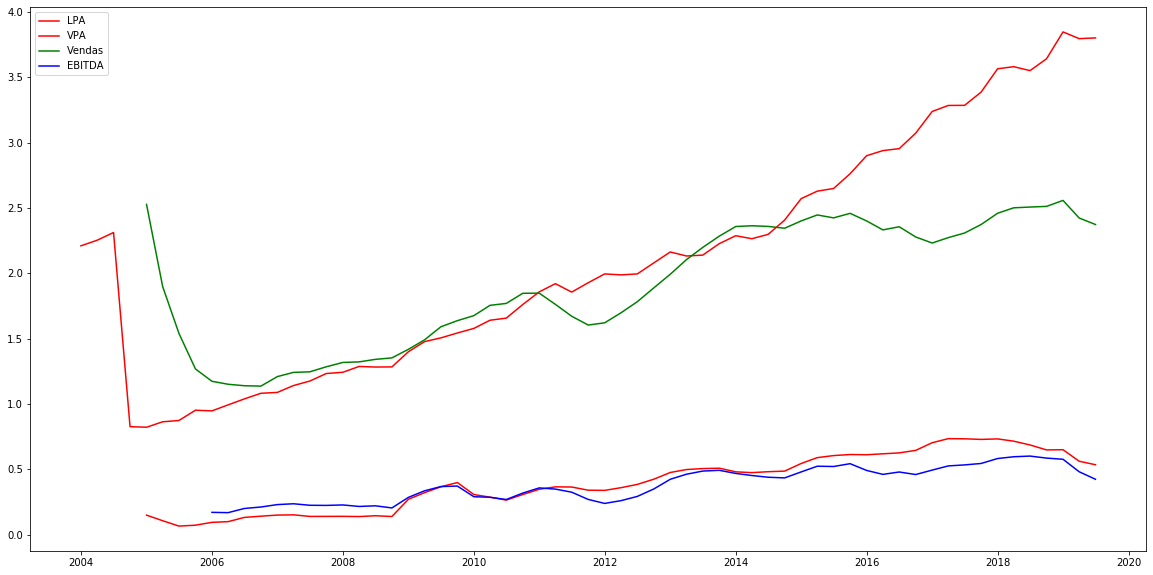

In [55]:
#plt.rcParams["figure.figsize"] = (20,10)
#plt.plot(dataset['LPA Lucro por Acao $'], color = 'red', label = 'LPA')
#plt.plot(dataset['VPA Valor Patr por Acao$'], color = 'red', label = 'VPA')
#plt.plot(dataset['Vendas por Acao $'], color = 'green', label = 'Vendas')
#plt.plot(dataset['EBITDA por Acao $'], color = 'blue', label = 'EBITDA')
#plt.legend()
#plt.plot()